# 1. 가중치 초기화 (weights initialization)

In [1]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

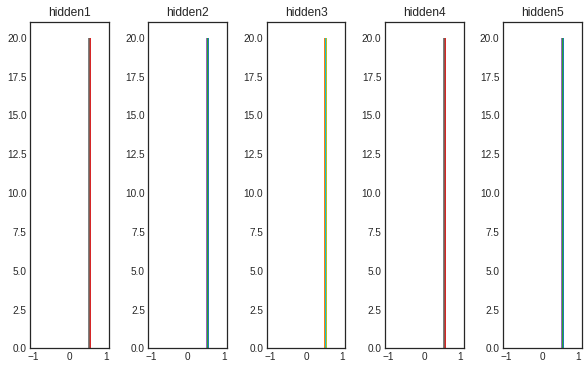

In [3]:
#제로 초기화
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

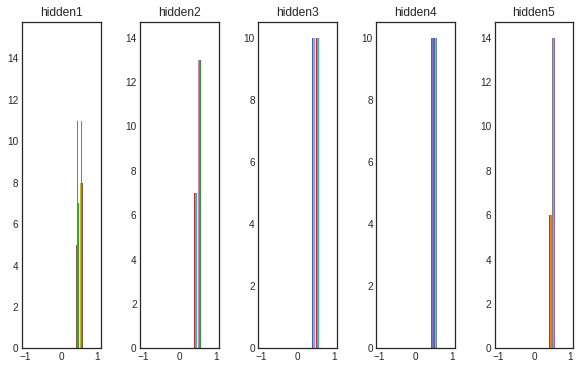

In [5]:
#정규분포 초기화
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

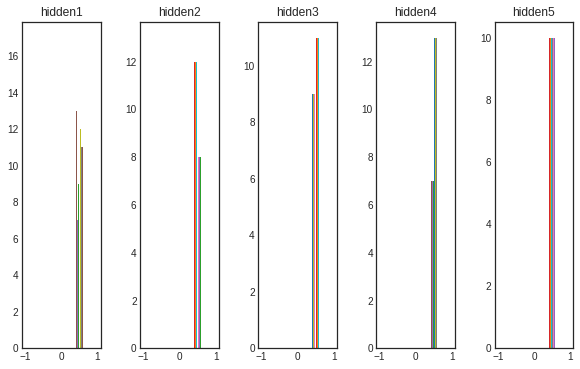

In [4]:
#균일분포 초기화
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

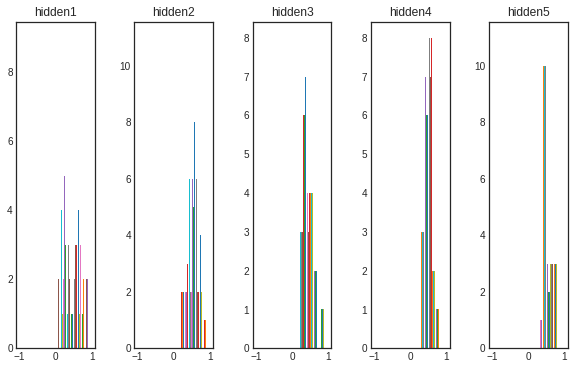

In [6]:
#xavier(glorot) 분포 초기화
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

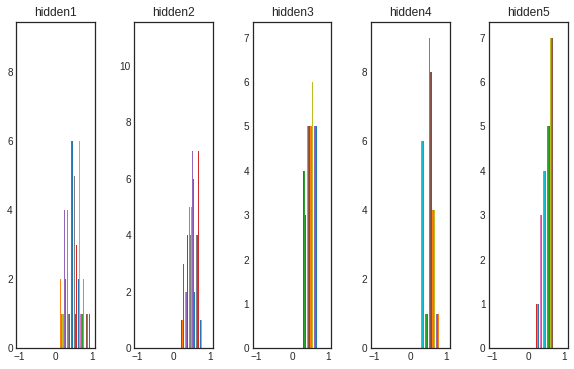

In [7]:
#xavier 균일분포 초기화
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

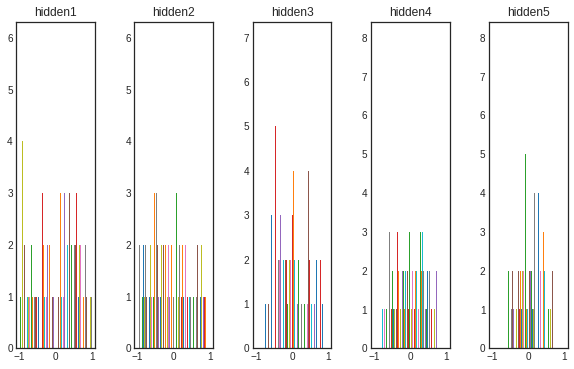

In [10]:
#활성화함수를 sigmoid 대신 tanh 적용하면 좀 더 균일한 분포를 보인다.
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

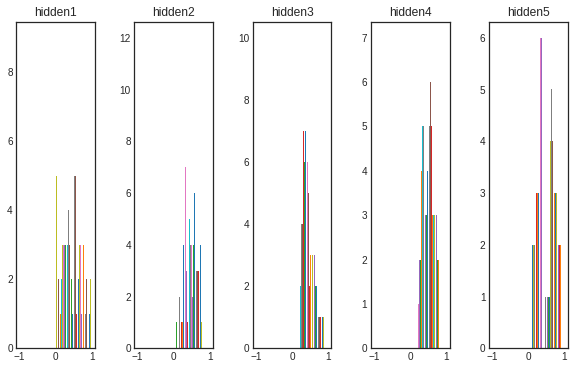

In [8]:
#HE 분포 초기화
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

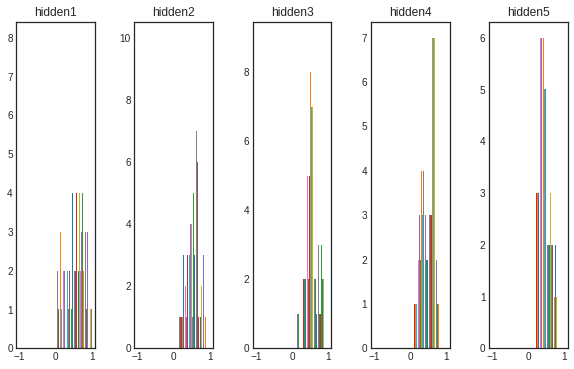

In [9]:
#HE 균일분포 초기화 
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

* 비선형은 위에서 다 activations.relu 로만 바꿔주면 됨

---

# 로이터 실습

In [11]:
#데이터 로드
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [12]:
word_index = reuters.get_word_index()

In [14]:
index_word = dict([(value, key) for (key, value) in word_index.items()])

In [15]:
news = ' '.join(str(i) for i in train_data[0])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [16]:
news = ' '.join(index_word.get(i-3, '?') for i in train_data[0])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [17]:
#텍스트 데이터를 벡터화한다

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [18]:
#뉴스주제인 레이블도 원-핫 인코딩한다.
#케라스에서는 to_categorical 로 원핫인코딩을 쉽게 할 수 있다

from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
#모델 구성
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


* 정의한 모델에 사용할 옵티마이저는 rmsprop를 사용하고, 손실 함수는 다중 분류이므로 categorical_crossentropy를 지정합니다. 그리고 지표는 accuracy를 사용하고, 모델의 구조를 summary() 함수를 통해 살펴봅니다.
* rmsprop : Root Mean Square Propagation

In [23]:
history = model.fit(x_train, y_train, 
                    epochs=40, 
                    batch_size=512, 
                    validation_data=(x_test,y_test))

Epoch 1/40
18/18 [==============================] - 1s 36ms/step - loss: 2.0985 - accuracy: 0.5788 - val_loss: 1.3601 - val_accuracy: 0.7012
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 1.0564 - accuracy: 0.7711 - val_loss: 1.0970 - val_accuracy: 0.7551
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.7430 - accuracy: 0.8416 - val_loss: 0.9883 - val_accuracy: 0.7836
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 0.5316 - accuracy: 0.8909 - val_loss: 0.9420 - val_accuracy: 0.7881
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3927 - accuracy: 0.9172 - val_loss: 0.9194 - val_accuracy: 0.7979
Epoch 6/40
18/18 [==============================] - 0s 15ms/step - loss: 0.3142 - accuracy: 0.9266 - val_loss: 0.9224 - val_accuracy: 0.7952
Epoch 7/40
18/18 [==============================] - 0s 19ms/step - loss: 0.2384 - accuracy: 0.9449 - val_loss: 0.9180 - val_accuracy: 0.8023
Epoch 8/40
18

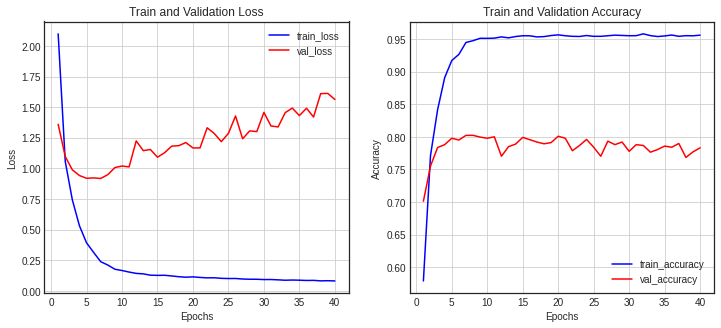

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
#가중치 초기화
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
  model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [26]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

In [27]:
#제로초기화
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 1s 33ms/step - loss: 3.8103 - accuracy: 0.1417 - val_loss: 3.7956 - val_accuracy: 0.2110
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7842 - accuracy: 0.2170 - val_loss: 3.7726 - val_accuracy: 0.2110
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7615 - accuracy: 0.2237 - val_loss: 3.7506 - val_accuracy: 0.2110
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 3.7392 - accuracy: 0.2237 - val_loss: 3.7287 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7171 - accuracy: 0.2554 - val_loss: 3.7071 - val_accuracy: 0.2110
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 3.6952 - accuracy: 0.2570 - val_loss: 3.6857 - val_accuracy: 0.2110
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 3.6735 - accuracy: 0.2596 - val_loss: 3.6644 - val_accuracy: 0.2110
Epoch 8/40
18

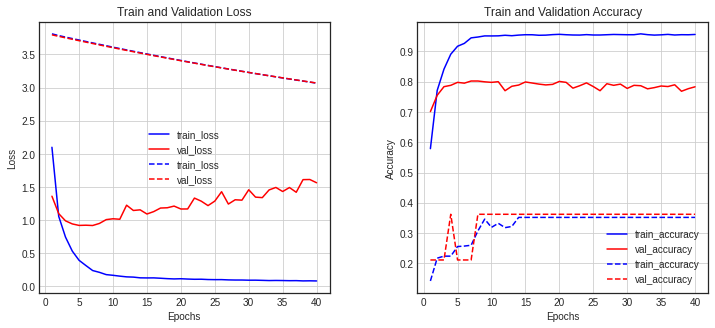

In [28]:
diff_history(history, zero_history)

In [29]:
#정규분포 초기화
normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 [==============================] - 1s 33ms/step - loss: 2.2541 - accuracy: 0.5210 - val_loss: 1.5424 - val_accuracy: 0.6545
Epoch 2/40
18/18 [==============================] - 0s 12ms/step - loss: 1.2753 - accuracy: 0.7070 - val_loss: 1.2635 - val_accuracy: 0.7084
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.9758 - accuracy: 0.7787 - val_loss: 1.1262 - val_accuracy: 0.7556
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7432 - accuracy: 0.8348 - val_loss: 1.0318 - val_accuracy: 0.7631
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.5788 - accuracy: 0.8705 - val_loss: 0.9906 - val_accuracy: 0.7841
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.4548 - accuracy: 0.8977 - val_loss: 0.9560 - val_accuracy: 0.7872
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3472 - accuracy: 0.9225 - val_loss: 0.9474 - val_accuracy: 0.7930
Epoch 8/40
18

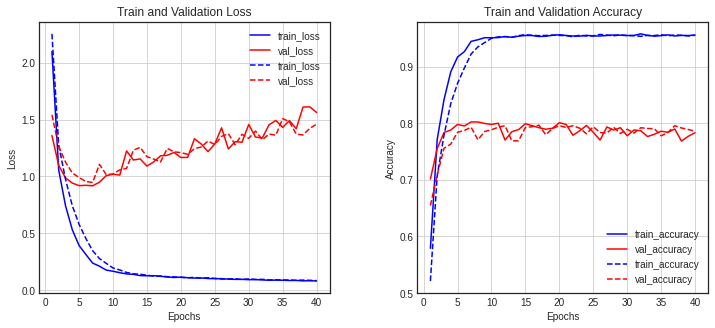

In [30]:
diff_history(history, normal_history)

In [31]:
#xavier 초기화
glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 [==============================] - 1s 32ms/step - loss: 2.1013 - accuracy: 0.5744 - val_loss: 1.3972 - val_accuracy: 0.6999
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 1.0647 - accuracy: 0.7728 - val_loss: 1.1247 - val_accuracy: 0.7516
Epoch 3/40
18/18 [==============================] - 0s 12ms/step - loss: 0.7459 - accuracy: 0.8435 - val_loss: 1.0111 - val_accuracy: 0.7769
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.5290 - accuracy: 0.8921 - val_loss: 0.9526 - val_accuracy: 0.7863
Epoch 5/40
18/18 [==============================] - 0s 12ms/step - loss: 0.3944 - accuracy: 0.9154 - val_loss: 0.9363 - val_accuracy: 0.7952
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3099 - accuracy: 0.9321 - val_loss: 0.9515 - val_accuracy: 0.7970
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2371 - accuracy: 0.9440 - val_loss: 0.9593 - val_accuracy: 0.7988
Epoch 8/40
18

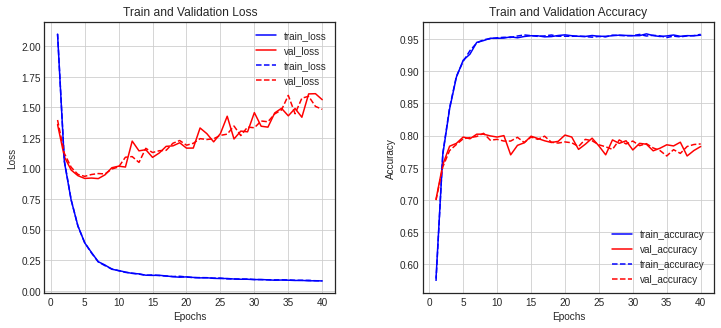

In [32]:
diff_history(history, glorot_history)

In [34]:
#HE 초기화
he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 1.9694 - accuracy: 0.5986 - val_loss: 1.2990 - val_accuracy: 0.7133
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 0.9666 - accuracy: 0.7947 - val_loss: 1.0783 - val_accuracy: 0.7698
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.6479 - accuracy: 0.8615 - val_loss: 0.9581 - val_accuracy: 0.7850
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.4418 - accuracy: 0.9075 - val_loss: 0.9732 - val_accuracy: 0.7823
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3232 - accuracy: 0.9309 - val_loss: 0.9888 - val_accuracy: 0.7769
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2459 - accuracy: 0.9438 - val_loss: 0.9355 - val_accuracy: 0.8019
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2122 - accuracy: 0.9467 - val_loss: 0.9844 - val_accuracy: 0.7898
Epoch 8/40
18

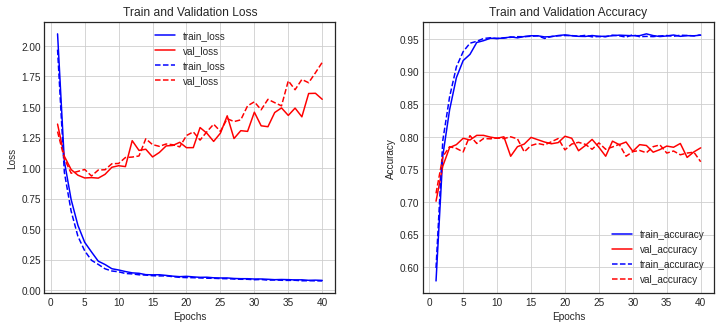

In [36]:
diff_history(history, he_history)

---

# 배치 정규화
- Dense이후, activation 이전에 활용한다

In [37]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(128, input_shape=(10000,
                                        ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)              

In [38]:
batch_norm_history = model.fit(x_train, y_train, epochs=40,
                              batch_size=512, validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 33ms/step - loss: 1.7643 - accuracy: 0.6571 - val_loss: 3.2997 - val_accuracy: 0.7435
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 0.6426 - accuracy: 0.8817 - val_loss: 3.0635 - val_accuracy: 0.7502
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3501 - accuracy: 0.9338 - val_loss: 2.7098 - val_accuracy: 0.6928
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2288 - accuracy: 0.9483 - val_loss: 2.3713 - val_accuracy: 0.6910
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1792 - accuracy: 0.9512 - val_loss: 2.0353 - val_accuracy: 0.6612
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1534 - accuracy: 0.9505 - val_loss: 1.7165 - val_accuracy: 0.7004
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1376 - accuracy: 0.9529 - val_loss: 1.4877 - val_accuracy: 0.7320
Epoch 8/40
18

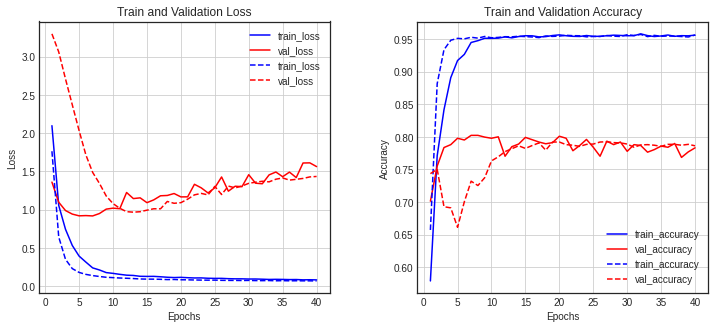

In [39]:
diff_history(history, batch_norm_history)